In [74]:
#Data collection
#load needed python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [75]:
#locate working direcotyr
os.getcwd()

'C:\\Users\\chris\\Springboard_rep\\Capstone-Project-2'

In [76]:
#loading the dataset of interest
df = pd.read_csv('appstore_games.csv')
#Drop columns URL, Name, Subtitle, Icon URL, Description, Delevoper, Genres, Current Version Release Date
df.drop(['URL', 'Name', 'Subtitle', 'Icon URL', 'Description', 'Developer', 'Genres', 'Current Version Release Date'], axis=1, inplace=True)
df.rename(columns = {'Average User Rating':'Rating', 'User Rating Count': 'Rating Count', 'In-app Purchases': 'InAppPurc',
                     'Original Release Date': 'Org Rel Date', 'Primary Genre':'Genre',
                     'Languages':'Lang'}, inplace=True)

In [77]:
#check the shape and head of the modified datafram
print(df.shape)
print(df.head())

(17007, 10)
          ID  Rating  Rating Count  Price InAppPurc Age Rating  \
0  284921427     4.0        3553.0   2.99       NaN         4+   
1  284926400     3.5         284.0   1.99       NaN         4+   
2  284946595     3.0        8376.0   0.00       NaN         4+   
3  285755462     3.5      190394.0   0.00       NaN         4+   
4  285831220     3.5          28.0   2.99       NaN         4+   

                                                Lang        Size  Genre  \
0  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  15853568.0  Games   
1                                                 EN  12328960.0  Games   
2                                                 EN    674816.0  Games   
3  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  21552128.0  Games   
4  DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...  34689024.0  Games   

  Org Rel Date  
0   11/07/2008  
1   11/07/2008  
2   11/07/2008  
3   23/07/2008  
4   18/07/2008  


In [78]:
#check for duplicates on ID and drop them
df_sort = df.sort_values(by='ID')
duplicateRowsDF = df_sort[df_sort['ID'].duplicated()]
#Print out how many duplicates were spotted in the dataset
print('**Duplicated rows in the dataset**')
print(df_sort['ID'].duplicated().value_counts())
#Drop duplicates 
df = df_sort.drop_duplicates()
print(df.shape)

**Duplicated rows in the dataset**
False    16847
True       160
Name: ID, dtype: int64
(16847, 10)


In [79]:
#testing to make sure duplicates were dropped by looking at shape
print(df.shape)

(16847, 10)


In [80]:
#Filled missing lang fields with "EN" and counted number of languages for each app 
df['Lang'].fillna('EN', inplace=True)
df['Lang_count'] = df.Lang.str.count(",") + 1
df.drop(['Lang'],axis=1, inplace=True)

C:\Users\chris\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\chris\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\chris\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [81]:
#Turn 'InAppPurc' column into a bool condition
#True if In app purchse is available in the app
df['InAppPurc'] = df['InAppPurc'].notnull()

C:\Users\chris\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
#Obtain a unique list of genre categories
genre_list = df['Genre'].tolist()

def convert(g_list, seperator=','):
    return seperator.join(g_list)
genre_list_convert = convert(genre_list)
genre_list_clean = genre_list_convert.split(',')

#Count the number of genres for each app - Not needed anymore since we are using just one genre per app
#df['gen_count'] = df.Genres.str.count(",") +1

genre_list = df['Genre'].tolist()

genre_cleaner = sorted(set([g.strip() for g in genre_list_clean]))

print(genre_cleaner, type(genre_cleaner))


['Book', 'Business', 'Education', 'Entertainment', 'Finance', 'Food & Drink', 'Games', 'Health & Fitness', 'Lifestyle', 'Medical', 'Music', 'Navigation', 'News', 'Productivity', 'Reference', 'Shopping', 'Social Networking', 'Sports', 'Stickers', 'Travel', 'Utilities'] <class 'list'>


In [83]:
#Inspect df
print(df)
print(df.info())
print(df.describe().T)

               ID  Rating  Rating Count  Price  InAppPurc Age Rating  \
0       284921427     4.0        3553.0   2.99      False         4+   
1       284926400     3.5         284.0   1.99      False         4+   
2       284946595     3.0        8376.0   0.00      False         4+   
3       285755462     3.5      190394.0   0.00      False         4+   
4       285831220     3.5          28.0   2.99      False         4+   
...           ...     ...           ...    ...        ...        ...   
17002  1474626442     NaN           NaN   0.00      False         4+   
17003  1474919257     NaN           NaN   0.00      False         4+   
17004  1474962324     NaN           NaN   0.00      False         4+   
17005  1474963671     NaN           NaN   0.00       True         4+   
17006  1475076711     NaN           NaN   0.00      False         4+   

              Size  Genre Org Rel Date  Lang_count  
0       15853568.0  Games   11/07/2008          17  
1       12328960.0  Games   1

In [84]:
#what should I do with the apps with no rating and price? 
#For now I will leave it in as NaN for both Rating and Rating Count

In [85]:
#Filled missing size fields with mean
df['Size'].fillna((df['Size'].mean()), inplace=True)

C:\Users\chris\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [86]:
#Fill 24 missing Price fields with mean
df['Price'].fillna((df['Price'].mean()), inplace=True)

In [87]:
#Strip off '+' from Age Rating and convert to int
df['Age Rating'] = df['Age Rating'].map(lambda x: x.rstrip('+'))
df['Age Rating'] = df['Age Rating'].astype(str).astype(int)

C:\Users\chris\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\chris\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
#Convert Org Rel Date to datetime format

df[['Org Rel Date']] = df[['Org Rel Date']].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16847 entries, 0 to 17006
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            16847 non-null  int64         
 1   Rating        7488 non-null   float64       
 2   Rating Count  7488 non-null   float64       
 3   Price         16847 non-null  float64       
 4   InAppPurc     16847 non-null  bool          
 5   Age Rating    16847 non-null  int32         
 6   Size          16847 non-null  float64       
 7   Genre         16847 non-null  object        
 8   Org Rel Date  16847 non-null  datetime64[ns]
 9   Lang_count    16847 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int32(1), int64(2), object(1)
memory usage: 1.2+ MB


C:\Users\chris\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [89]:
#output a csv file from the dataframe
df.to_csv('output.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16847 entries, 0 to 17006
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            16847 non-null  int64         
 1   Rating        7488 non-null   float64       
 2   Rating Count  7488 non-null   float64       
 3   Price         16847 non-null  float64       
 4   InAppPurc     16847 non-null  bool          
 5   Age Rating    16847 non-null  int32         
 6   Size          16847 non-null  float64       
 7   Genre         16847 non-null  object        
 8   Org Rel Date  16847 non-null  datetime64[ns]
 9   Lang_count    16847 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int32(1), int64(2), object(1)
memory usage: 1.2+ MB


In [90]:
df.head()

,ID,Rating,Rating Count,Price,InAppPurc,Age Rating,Size,Genre,Org Rel Date,Lang_count
0,284921427,4.0,3553.0,2.99,False,4,15853568.0,Games,2008-11-07,17
1,284926400,3.5,284.0,1.99,False,4,12328960.0,Games,2008-11-07,1
2,284946595,3.0,8376.0,0.00,False,4,674816.0,Games,2008-11-07,1
3,285755462,3.5,190394.0,0.00,False,4,21552128.0,Games,2008-07-23,17
4,285831220,3.5,28.0,2.99,False,4,34689024.0,Games,2008-07-18,15


In [91]:
#EDA 
#Look at the distribution of the data
df.describe()


,ID,Rating,Rating Count,Price,Age Rating,Size,Lang_count
count,1.684700e+04,7488.000000,7.488000e+03,16847.000000,16847.000000,1.684700e+04,16847.000000
mean,1.059651e+09,4.062099,3.306245e+03,0.815349,6.205734,1.158181e+08,3.254229
std,2.999351e+08,0.750506,4.251578e+04,7.865649,3.625229,2.043153e+08,6.165888
min,2.849214e+08,1.000000,5.000000e+00,0.000000,4.000000,5.132800e+04,1.000000
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,4.000000,2.295040e+07,1.000000
50%,1.112429e+09,4.500000,4.600000e+01,0.000000,4.000000,5.674701e+07,1.000000
75%,1.286958e+09,4.500000,3.072500e+02,0.000000,9.000000,1.329592e+08,2.000000
max,1.475077e+09,5.000000,3.032734e+06,179.990000,17.000000,4.005591e+09,111.000000


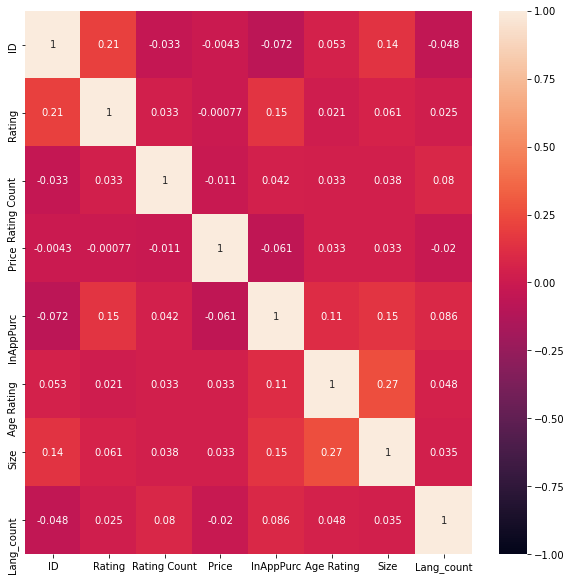

In [92]:
#create a heatmap to see how variable correlate
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

Text(0.5, 1.0, 'Variables v Rating')

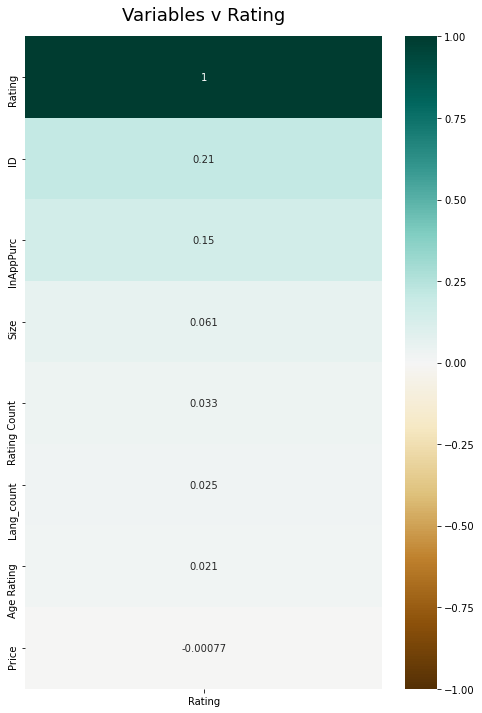

In [93]:
plt.figure(figsize=(8,12))
heatmap1 = sns.heatmap(df.corr()[['Rating']].sort_values(by="Rating", ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap1.set_title('Variables v Rating', fontdict={'fontsize':18}, pad=16)

C:\Users\chris\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


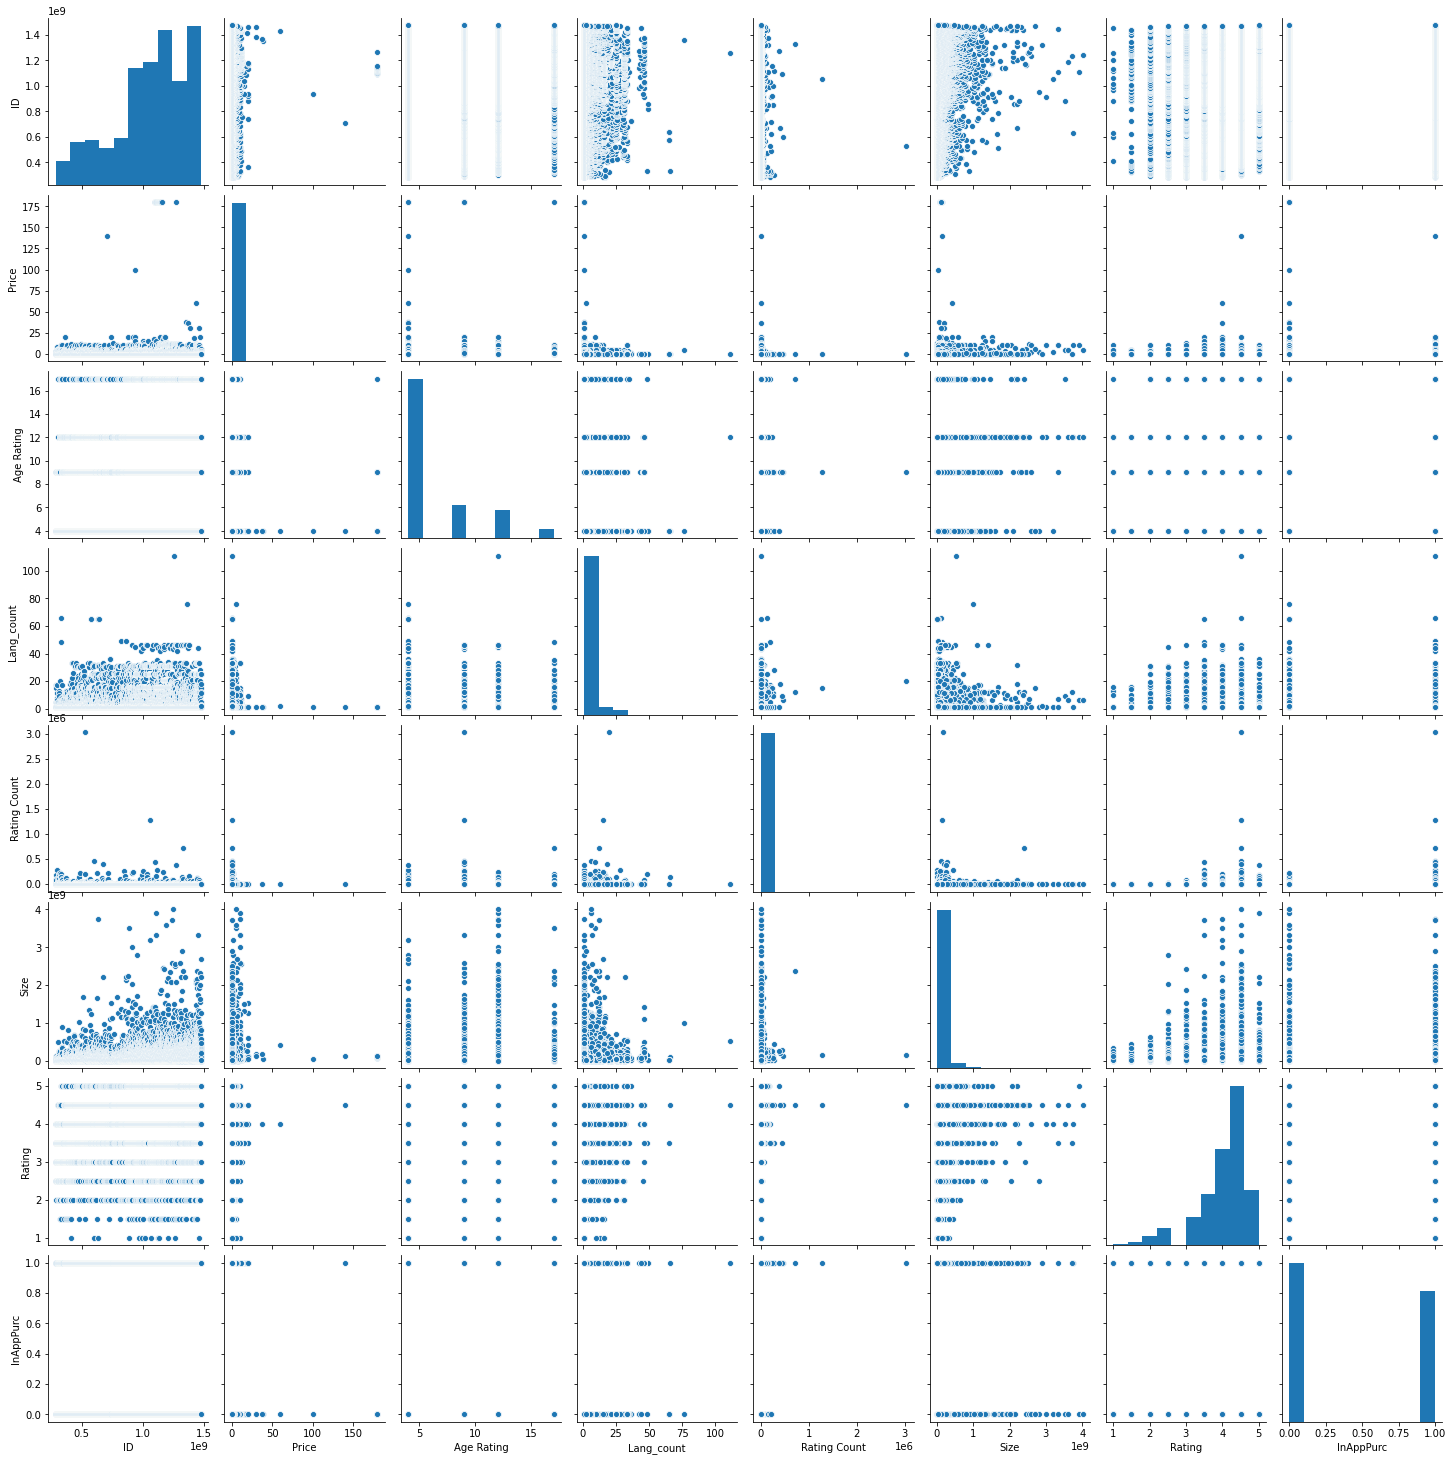

In [100]:
#Convert InAppPurc column boolean to int
df['InAppPurc'] = df['InAppPurc'].astype(int)
#pairplot for all the numerical variables
pair = sns.pairplot(df, vars=['ID','Price', 'Age Rating', 'Lang_count', 'Rating Count', 'Size', 'Rating', 'InAppPurc'])
plt.show()


In [87]:
#EDA plots of interest
#correlation heat map - above
#Plot the Rating vs Size (memory)
#Plot the Rating vs Lang Count
#Plot the Rating Count vs Rating
#Plot the InAppPurc vs Rating
#Plot the Size vs Rating
#Plot the Age Rating vs Rating
#Plot the Rating Count vs Age Rating

#df.head()
#plt.show()


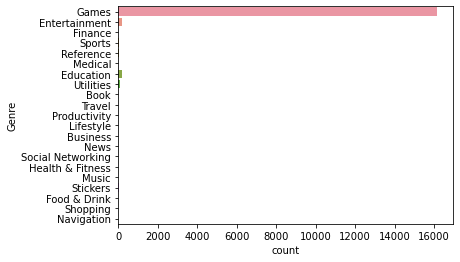

In [95]:
#Plotting the Genre count 
sns.countplot(y='Genre', data=df)
#The Games Genre is the most popular 

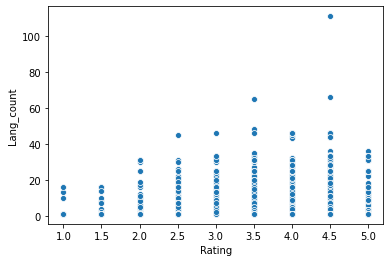

In [96]:
#Scatter plot of Lang_count vs Rating
sns.scatterplot(y='Lang_count', x='Rating', data=df)

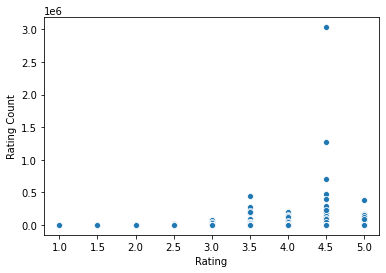

In [97]:
#Scatter plot of Rating Count vs Rating
sns.scatterplot(y='Rating Count', x='Rating', data=df)

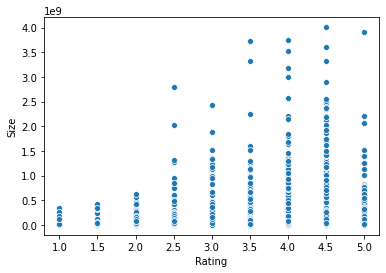

In [98]:
#Scatter plot of Size vs Rating
sns.scatterplot(y='Size', x='Rating', data=df)

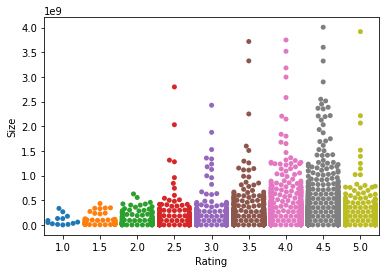

In [99]:
sns.swarmplot(data=df, x='Rating', y='Size')
plt.xlabel('Rating')
plt.ylabel('Size')
plt.savefig('Rating vs Size')
plt.show()

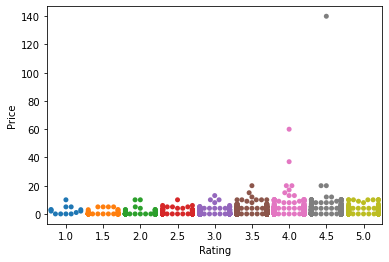

In [104]:
sns.swarmplot(data=df, x='Rating', y='Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.savefig('Rating vs Price')
plt.show()

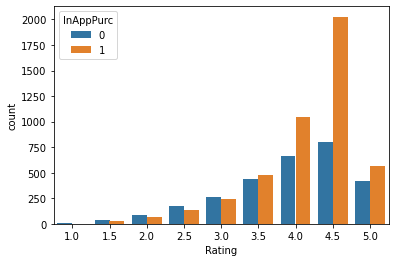

In [105]:
#Rating vs count split into In App Purchases
sns.countplot(x='Rating', data=df, hue="InAppPurc")

In [106]:
#Observation shows that low ratings of 1-3, no in app purchases are greater and 3.5 and greater shows that
#In app purchases are more popular.

In [110]:
#Pandas weighted average of No InAppPurc vs InAppPurc grouped by Rating
def weighted_average(df, values, weights):
    return sum(df[weights] * df[values]) / df[weights].sum()
print(df.groupby('Rating').apply(weighted_average,'InAppPurc', 'Rating Count' ))

Rating
1.0    0.120370
1.5    0.647909
2.0    0.336932
2.5    0.232285
3.0    0.252097
3.5    0.510738
4.0    0.763097
4.5    0.956104
5.0    0.961480
dtype: float64


In [140]:
#Calculated weighted average of Ratings with respect to InAppPurc vs Non-InAppPurc
#Rating is the values and weights is the Rating Count 
def total_weighted_average(df,values, weights):
    return sum(df[weights] * df[values]) / df[weights].sum()
print(total_weighted_average(df, 'Rating', 'Rating Count'))


4.476378862048537


In [142]:
#Pandas weighted average of Rating and Rating Count grouped by InAppPurc
def weighted_rating_average(df, values, weights):
    return sum(df[weights] * df[values]) / df[weights].sum()
print(df.groupby('InAppPurc').apply(weighted_rating_average,'Rating', 'Rating Count' ))

InAppPurc
0    4.452899
1    4.477656
dtype: float64


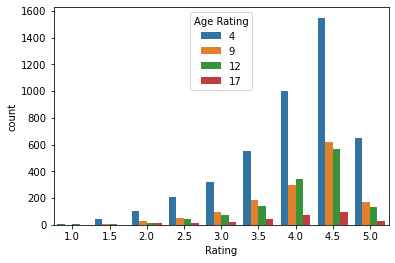

In [40]:
#Rating vs count split into Age Rating
sns.countplot(x='Rating', data=df, hue="Age Rating")

In [ ]:
#Observation shows that an Age Rating of 4 and above accounts for most of the ratings

In [132]:
#df.plot("Org Rel Date", "Rating", figsize=(20,4))

In [ ]:
#Observation of general increase in ratings over time

C:\Users\chris\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\chris\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\chris\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

Text(0.5, 1.0, 'Average Rating vs Time')

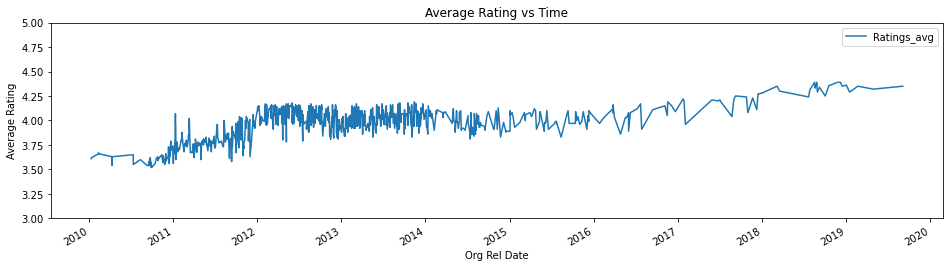

In [136]:
#calculate simple moving average of Rating vs Original release date
df['Ratings_avg'] = df['Rating'].rolling(50).mean()
df.dropna(inplace=True)
#Calulate cummulative moving average of Rating vs Orginal release date
df['Ratings_c_avg'] = df['Rating'].mean()
df.plot('Org Rel Date', "Ratings_avg", figsize=(16,4))
plt.ylim(3,5)
plt.ylabel('Average Rating')
plt.title('Average Rating vs Time')

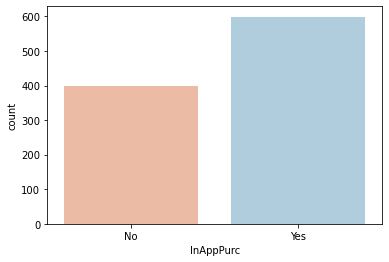

In [143]:
#Plot showing the relationship between in app purchases
plt.figure()
sns.countplot(x='InAppPurc', hue= data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()